## Sequence to protein mapping with PepExplorer

### PepExplorer (Leprevost et al., 2014) is a sequence similarity-driven tool that takes the output of our de novo algorithm (PEAK), which contain candidate sequences with PTMs and confidence scores, and maps them to a user-defined target-decoy sequence database.

### PepExplorer is part of the Pattern Lab for Proteomics suite of tools available for free download [here](http://proteomics.fiocruz.br/software/pepexplorer/).

### I used PepExplorer 0.1.0.78 on my PC (x64 Windows 10). The parameters for searching de novo results (>50% ALC) were:

    - Min AAs in peptide: 5
    - Decoy method: reverse
    - PEAKS 8.0 parameters
    - MinIdent: 80%
    
### I exported the results of the alignments of each MED4 replicate vs. the MED4 sequence database (proteome from GenBank) and moved the .txt results to my local machine in this git directory. Using LibreOffice Calc I also took out only the protein IDs/# of alignments/spec counts/description and saved as a .csv:

In [13]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#from matplotlib_venn import venn2
#from matplotlib_venn import venn3
from matplotlib_venn import venn3, venn3_circles
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
cd /home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt/

/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt


In [3]:
# combining and exporting results for PepExplorer results from de novo peptide > 80% ALC
# read the protein files into dataframes and combined the replicates

pe1 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt/RAL95_MED2_trypsin_1_PTMopt_DN80_PepExplorer-vs-MED4Graa_15ppm.csv")
pe2 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt/RAL95_MED2_trypsin_2_PTMopt_DN80_PepExplorer-vs-MED4Graa_15ppm.csv")

frames = [pe1, pe2]

print(pe1.columns)
print(pe2.columns)

pe80prot = pe1.merge(pe2,  on='ProteinID', how= 'outer')

# how many redundant proteins?
print("# redundant PeaksDN80 proteins = ", len(pe80prot))

# export as a csv
pe80prot.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt/RAL4_MED2_combine_DN80PepEx.csv")

# get just protein list
pe80dup = pe80prot['ProteinID']

# deduplicate protein list
pe80 = pe80dup.drop_duplicates()

# how many nonredundant proteins?
print("# nonredundant PeaksDN80 proteins = ", len(pe80))

# export as a .txt file without headers
pe80.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/analyses/pronovo-2020/pepexplorer/med4-PTMopt/RAL4_MED2_combine_DN80_15ppm_PepEx_proteins.txt", header=False, index=False)

# take a look
pe80.head()

Index(['ProteinID', 'Alignments', 'SpecCounts', 'Unique', 'Coverage',
       'Protein description'],
      dtype='object')
Index(['ProteinID', 'Alignments', 'SpecCounts', 'Unique', 'Coverage',
       'Protein description'],
      dtype='object')
# redundant PeaksDN80 proteins =  1167
# nonredundant PeaksDN80 proteins =  1167


0    PMM0001
1    PMM0002
2    PMM0003
3    PMM0004
4    PMM0005
Name: ProteinID, dtype: object

### Let's compare to our Comet results!

We've already exported a .txt file that's a list of all the accession #'s found in the MED4 Comet nb.
We need to export a full list of proteins and identifying peptides in ProteinProphet.

In [4]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP


In [5]:
# read in Comet <1% FDR peptides created in MED4 Comet notebook
# @15 ppm tolerance against GenBank MED4 db with PTM optimzations, its XCorr > 2.17
# read in the version without DECOY proteins (there were just a couple, but still)

cometfull = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_Comet15_2.17XCorr_noDECOY.csv")

print("PSMs in Comet results < 1% FDR:", len(cometfull))

# deduplicate based on modified peptides (so, get all peptides)
cometpep = cometfull.drop_duplicates(subset='peptide')

# deduplicate based on protein name (PMM)
cometpro = cometfull.drop_duplicates(subset='protein')


print("peptide in full Comet results < 1% FDR:", len(cometpep))
print("proteins in full Comet results < 1% FDR:", len(cometpro))

# write to a csv

cometpro.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL4_MED2_trypsin_combine_PTMopt_Comet15_2.17XCorr_noDECOY_proteins.csv")

cometpro.head()

PSMs in Comet results < 1% FDR: 19809
peptide in full Comet results < 1% FDR: 7190
proteins in full Comet results < 1% FDR: 1217


,spectrum,xcorr,deltacn,expect,peptide,ions,calc_neutral_pep_mass,precursor_intensity,protein,protein_descr,...,n-deam,q-deam,k-iron,k-meth,r-meth,stripped peptide,stripped length,ptm-total,NAAF num.,binned
0,022016_RAL4_95_MED2_trypsin_1.37926.37926.2,6.713,0.789,3.740000e-16,K.SKPFNDGFNAATGDYVDMSAAGIVDPAK.V,41/54,2857.3229,5578550.0,PMM1436,| groEL | chaperonin GroEL,...,0,0,0,0,0,SKPFNDGFNAATGDYVDMSAAGIVDPAK,28,0,199233.928571,6.5-7
1,022016_RAL4_95_MED2_trypsin_1.31081.31081.2,6.630,0.708,1.080000e-05,K.IDIEDGGIVTIASHDGAAAEEAQK.L,36/46,2409.1660,1448720.0,PMM1191,| pnp | polynucleotide phosphorylase\polyadeny...,...,0,0,0,0,0,IDIEDGGIVTIASHDGAAAEEAQK,24,0,60363.333333,6.5-7
3,022016_RAL4_95_MED2_trypsin_1.33045.33045.2,6.521,0.768,2.670000e-13,R.AKNTGVEYAQ[129.04]GLVALGGDDEELAK.E,37/46,2448.2020,3484900.0,PMM0228,| psbO | photosystem II manganese-stabilizing ...,...,0,1,0,0,0,AKNTGVEYAQGLVALGGDDEELAK,24,1,145204.166667,6.5-7
5,022016_RAL4_95_MED2_trypsin_2.32518.32518.4,6.318,1.000,1.270000e-07,K.LAIDDSSIN[115.03]LDQVDYINAHGTSTTANDKNETSAIK.S,49/204,3734.7759,5246400.0,PMM1609,| fabF | 3-oxoacyl-[acyl-carrier-protein] synt...,...,1,0,0,0,0,LAIDDSSINLDQVDYINAHGTSTTANDKNETSAIK,35,1,149897.142857,6-6.5
12,022016_RAL4_95_MED2_trypsin_2.44677.44677.3,6.048,1.000,4.980000e-11,R.SNLNTVIIDKNPSVGALAITHQIAN[115.03]YPGVPVDISGEK.L,48/144,3845.0211,1562260.0,PMM0211,| trxB | FAD-dependent pyridine nucleotide-dis...,...,1,0,0,0,0,SNLNTVIIDKNPSVGALAITHQIANYPGVPVDISGEK,37,1,42223.243243,6-6.5


### Compare to PeaksDB proteins:

In the PeaksDB output there's a protein csv. 
We'll read that in as a pandas dataframe and see what it looks like.

In [6]:
cd /home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/MED_1_MED4-RAL_QE_PEAKS_163/

/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/MED_1_MED4-RAL_QE_PEAKS_163


In [7]:
ls

'MED_1_MED4-RAL_QE_PEAKS_163_DB search psm.csv'
'MED_1_MED4-RAL_QE_PEAKS_163_de novo only peptides.csv'
 MED_1_MED4-RAL_QE_PEAKS_163_peptide.csv
 MED_1_MED4-RAL_QE_PEAKS_163_peptides.pep.xml
 MED_1_MED4-RAL_QE_PEAKS_163_protein-peptides.csv
 MED_1_MED4-RAL_QE_PEAKS_163_proteins.csv
 MED_1_MED4-RAL_QE_PEAKS_163_proteins.fasta


In [8]:
# read the protein files into dataframes and combined the replicates

pdb1 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/MED_1_MED4-RAL_QE_PEAKS_163/MED_1_MED4-RAL_QE_PEAKS_163_proteins.csv")
pdb2 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/MED_2_MED4-RAL_QE_PEAKS_165/MED_2_MED4-RAL_QE_PEAKS_165_proteins.csv")

frames = [pdb1, pdb2]

print(pdb1.columns)
print(pdb2.columns)

# concatenate dataframes
pdb = pd.concat(frames, sort=False, ignore_index=True)

pdb.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDB/RAL4_MED2_trypsin_combine_PTMopt_PeaksDB20_15ppm_proteins.csv")

pdb.head()

Index(['Protein Group', 'Protein ID', 'Accession', '-10lgP', 'Coverage (%)',
       'Coverage (%) RAL95_trypsin_MED_1', 'Area RAL95_trypsin_MED_1',
       '#Peptides', '#Unique', '#Spec RAL95_trypsin_MED_1', 'PTM', 'Avg. Mass',
       'Description'],
      dtype='object')
Index(['Protein Group', 'Protein ID', 'Accession', '-10lgP', 'Coverage (%)',
       'Coverage (%) RAL95_trypsin_MED_2', 'Area RAL95_trypsin_MED_2',
       '#Peptides', '#Unique', '#Spec RAL95_trypsin_MED_2', 'PTM', 'Avg. Mass',
       'Description'],
      dtype='object')


,Protein Group,Protein ID,Accession,-10lgP,Coverage (%),Coverage (%) RAL95_trypsin_MED_1,Area RAL95_trypsin_MED_1,#Peptides,#Unique,#Spec RAL95_trypsin_MED_1,PTM,Avg. Mass,Description,Coverage (%) RAL95_trypsin_MED_2,Area RAL95_trypsin_MED_2,#Spec RAL95_trypsin_MED_2
0,1,9880,PMM1436,409.57,94,94.0,5.030000e+10,182,181,1295.0,Carbamidomethylation; Oxidation (M); Deamidati...,57441,| groEL | chaperonin GroEL,NaN,NaN,NaN
1,3,10366,PMM0452,339.33,68,68.0,7.650000e+09,66,65,259.0,Carbamidomethylation; Oxidation (M); Deamidati...,61441,| groEL | chaperonin GroEL,NaN,NaN,NaN
2,5,12773,PMM0228,322.95,84,84.0,4.360000e+09,51,51,164.0,Carbamidomethylation; Oxidation (M); Deamidati...,28114,| psbO | photosystem II manganese-stabilizing ...,NaN,NaN,NaN
3,14,9877,PMM1485,316.97,57,57.0,1.120000e+09,55,54,105.0,Carbamidomethylation; Oxidation (M); Deamidati...,122908,| rpoB | DNA-directed RNA polymerase subunit beta,NaN,NaN,NaN
4,4,9777,PMM1704,314.23,63,63.0,3.730000e+09,46,46,176.0,Carbamidomethylation; Oxidation (M); Deamidati...,68244,| dnaK | molecular chaperone DnaK,NaN,NaN,NaN


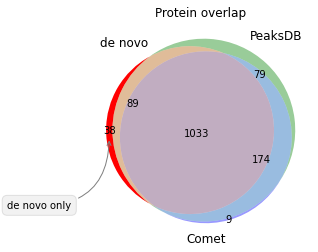

In [29]:
plt.figure(figsize=(4,4))
v = venn3(subsets=(38, 79, 89, 9, 0, 174, 1033), set_labels = ('de novo', 'PeaksDB', 'Comet'))
v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
#v.get_label_by_id('100').set_text('de novo only')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
#c[0].set_lw(1.0)
#c[0].set_ls('dotted')
plt.title("Protein overlap")
plt.annotate('de novo only', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()

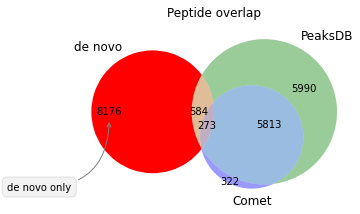

In [31]:
plt.figure(figsize=(5,5))
v = venn3(subsets=(8176, 5990, 584, 322, 0, 5813, 273), set_labels = ('de novo', 'PeaksDB', 'Comet'))
v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
#v.get_label_by_id('100').set_text('de novo only')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')
#c[0].set_lw(1.0)
#c[0].set_ls('dotted')
plt.title("Peptide overlap")
plt.annotate('de novo only', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()